# Final Project
## Catherine Ren
Description: This notebook expore census dataset of highest educational attainment in Los Angeles region. Tend to support finding possible relationships between the characteristics of the local populations and the rates of traffic crashes by merging comprehensive census tract data with collision data. My analysis will specifically focus on those with "Less than High School", "High School Graduate", and "Bachelor's degree".

## Importing Data and Census Data Exploration

In [1]:
# Importing the libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import contextily as ctx

In [2]:
# read and add shapefile to notebook
df = pd.read_csv('R13562211_SL140.csv')
df

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A12002_006,SE_A12002_007,SE_A12002_008,PCT_SE_A12002_002,PCT_SE_A12002_003,PCT_SE_A12002_004,PCT_SE_A12002_005,PCT_SE_A12002_006,PCT_SE_A12002_007,PCT_SE_A12002_008
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,157,32,19,8.18,23.15,39.76,22.25,5.03,1.03,0.61
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,357,61,126,16.09,15.36,30.14,21.04,11.40,1.95,4.02
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,163,33,20,23.24,18.83,28.98,20.51,6.37,1.29,0.78
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,178,23,56,25.88,16.55,30.35,17.64,6.64,0.86,2.09
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,29,12,0,14.11,33.88,39.95,10.10,1.39,0.57,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,6037980038,"Census Tract 9800.38, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494,6037980039,"Census Tract 9800.39, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,6,37,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2495,6037990100,"Census Tract 9901, Los Angeles County, California",ca,140,0,NaN,NaN,NaN,6,37,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,6037990200,"Census Tract 9902, Los Angeles County, California",ca,140,0,NaN,NaN,NaN,6,37,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we've previously covered the fundamental details of this dataset in Week 3, we'll skip those initial steps in this session.

In [3]:
# try to see all the data and display a sample row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A12002_001,SE_A12002_002,SE_A12002_003,SE_A12002_004,SE_A12002_005,SE_A12002_006,SE_A12002_007,SE_A12002_008,PCT_SE_A12002_002,PCT_SE_A12002_003,PCT_SE_A12002_004,PCT_SE_A12002_005,PCT_SE_A12002_006,PCT_SE_A12002_007,PCT_SE_A12002_008
798,6037231100,"Census Tract 2311, Los Angeles County, California",ca,140,0,NaN,NaN,NaN,6,37,NaN,NaN,231100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 2311,NaN,NaN,NaN,2600,1093,611,667,183,30,8,8,42.04,23.5,25.65,7.04,1.15,0.31,0.31


In [4]:
# convert FIPS, STATE, and COUNTY to string
df = pd.read_csv(
    'R13562211_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [5]:
# check data again
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A12002_001,SE_A12002_002,SE_A12002_003,SE_A12002_004,SE_A12002_005,SE_A12002_006,SE_A12002_007,SE_A12002_008,PCT_SE_A12002_002,PCT_SE_A12002_003,PCT_SE_A12002_004,PCT_SE_A12002_005,PCT_SE_A12002_006,PCT_SE_A12002_007,PCT_SE_A12002_008
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.10,NaN,NaN,NaN,3119,255,722,1240,694,157,32,19,8.18,23.15,39.76,22.25,5.03,1.03,0.61
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.22,NaN,NaN,NaN,3132,504,481,944,659,357,61,126,16.09,15.36,30.14,21.04,11.40,1.95,4.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.20,NaN,NaN,NaN,2560,595,482,742,525,163,33,20,23.24,18.83,28.98,20.51,6.37,1.29,0.78
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.21,NaN,NaN,NaN,2682,694,444,814,473,178,23,56,25.88,16.55,30.35,17.64,6.64,0.86,2.09
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.22,NaN,NaN,NaN,2090,295,708,835,211,29,12,0,14.11,33.88,39.95,10.10,1.39,0.57,0.00


In [6]:
# confirm the columns have correct data type
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [7]:
# check which columns are null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [8]:
# delete null columns
df = df.dropna(axis=1,how="all")

In [9]:
# check data information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_NAME           2498 non-null   object 
 9   SE_A12002_001      2498 non-null   int64  
 10  SE_A12002_002      2498 non-null   int64  
 11  SE_A12002_003      2498 non-null   int64  
 12  SE_A12002_004      2498 non-null   int64  
 13  SE_A12002_005      2498 non-null   int64  
 14  SE_A12002_006      2498 non-null   int64  
 15  SE_A12002_007      2498 non-null   int64  
 16  SE_A12002_008      2498 

In [10]:
# display and check the fisrt 5 row
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A12002_001,SE_A12002_002,SE_A12002_003,SE_A12002_004,SE_A12002_005,SE_A12002_006,SE_A12002_007,SE_A12002_008,PCT_SE_A12002_002,PCT_SE_A12002_003,PCT_SE_A12002_004,PCT_SE_A12002_005,PCT_SE_A12002_006,PCT_SE_A12002_007,PCT_SE_A12002_008
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,3119,255,722,1240,694,157,32,19,8.18,23.15,39.76,22.25,5.03,1.03,0.61
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,3132,504,481,944,659,357,61,126,16.09,15.36,30.14,21.04,11.40,1.95,4.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,2560,595,482,742,525,163,33,20,23.24,18.83,28.98,20.51,6.37,1.29,0.78
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,2682,694,444,814,473,178,23,56,25.88,16.55,30.35,17.64,6.64,0.86,2.09
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,2090,295,708,835,211,29,12,0,14.11,33.88,39.95,10.10,1.39,0.57,0.00


In [11]:
# define the columns that I want to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A12002_001',
                   'SE_A12002_002',
                   'SE_A12002_003',
                   'SE_A12002_004',
                   'SE_A12002_005',
                   'SE_A12002_006',
                   'SE_A12002_007',
                   'SE_A12002_008']

In [12]:
# save these columns
df2 = df[columns_to_keep]

In [13]:
# return list of columns
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A12002_001',
 'SE_A12002_002',
 'SE_A12002_003',
 'SE_A12002_004',
 'SE_A12002_005',
 'SE_A12002_006',
 'SE_A12002_007',
 'SE_A12002_008']

In [14]:
# rename these columns
df2.columns = ['FIPS',
'Population 25 Years and Over',
'Less than High School',
'High School Graduate',
'Some College',
'Bachelor',
'Master',
'Professional School',
'Doctorate']

In [15]:
# display five random samples to confirm the columns rename successfully
df2.sample(5)

,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
1845,06037550601,4195,644,1119,1279,853,219,44,37
602,06037207502,3402,815,246,722,833,446,276,64
1541,06037481604,2966,337,621,877,838,242,18,33
27,06037104322,1225,573,346,135,110,42,19,0
1557,06037482301,3812,1599,1002,563,590,51,0,7


<Axes: ylabel='Frequency'>

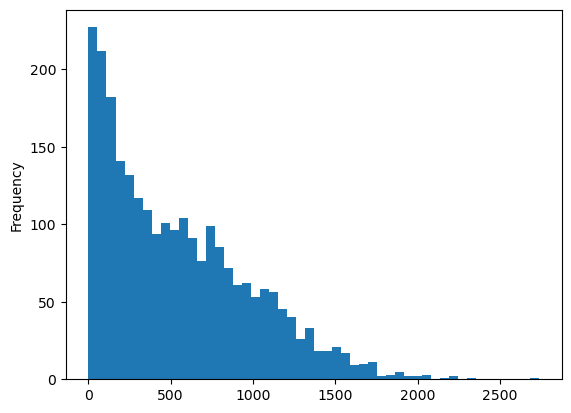

In [17]:
# plot this column as a historgram with 50 bins
df2['Less than High School'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

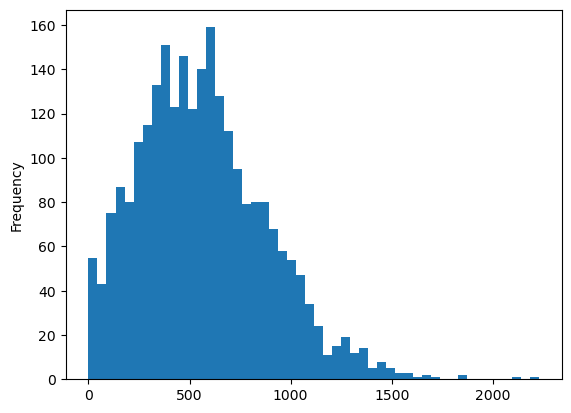

In [16]:
# plot this column as a historgram with 50 bins
df2['High School Graduate'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

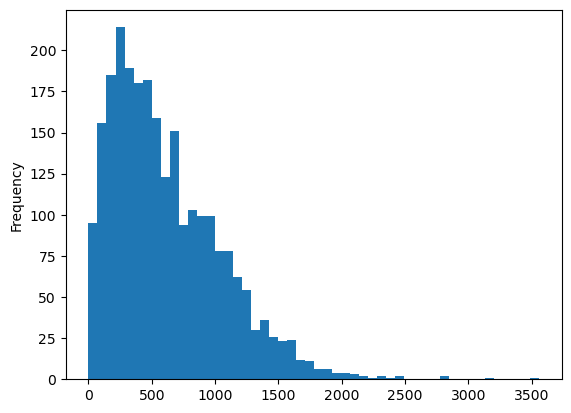

In [18]:
# plot this column as a historgram with 50 bins
df2['Bachelor'].plot.hist(bins=50)

In [19]:
# define variable
df_sorted = df2.sort_values(by='Less than High School',ascending = False)

In [20]:
# display the first ten data
df_sorted[['FIPS','Less than High School']].head(10)

,FIPS,Less than High School
580,06037206020,2740
1691,06037532900,2343
1770,06037540202,2207
1432,06037433103,2193
1740,06037535101,2149
795,06037229300,2050
1721,06037534102,2048
885,06037240401,2043
1604,06037502303,2021
1737,06037534900,2007


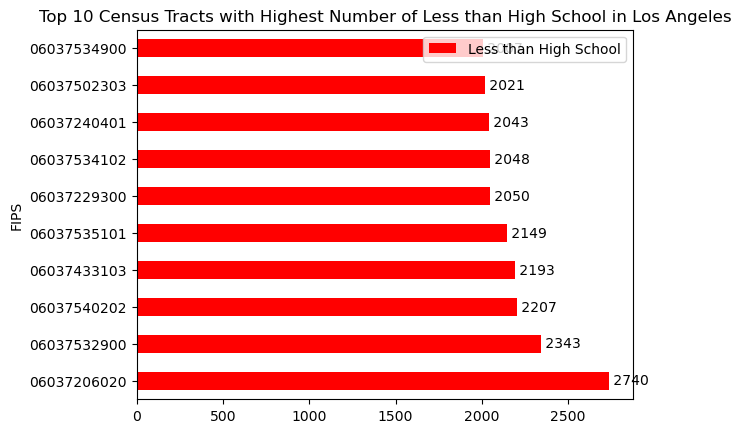

In [21]:
import matplotlib.pyplot as plt
# make the figure looks better
ax = df_sorted.head(10).plot.barh(x='FIPS',
                            y='Less than High School', 
                            title='Top 10 Census Tracts with Highest Number of Less than High School in Los Angeles',
                            color='red')

# add number for each column
# define numbers
numbers = [2740, 2343, 2207, 2193, 2149, 2050, 2048, 2043, 2021, 2007]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.show()

In [22]:
# display the first ten data
df_sorted = df2.sort_values(by='Less than High School',ascending = False)
df_filtered = df_sorted[df_sorted['Less than High School'] != 0]
df_filtered[['FIPS', 'Less than High School']].tail(10)

,FIPS,Less than High School
2394,06037910809,6
2155,06037620201,5
385,06037143606,5
2296,06037800336,5
1453,06037460001,4
2488,06037980033,3
2482,06037980024,3
2285,06037800104,3
1495,06037463500,3
923,06037262604,1


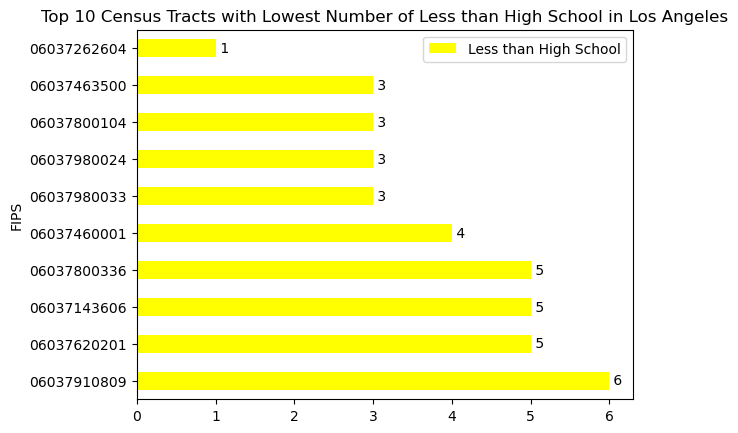

In [23]:
# make the figure looks better
ax = df_filtered.tail(10).plot.barh(x='FIPS',
                            y='Less than High School', 
                            title='Top 10 Census Tracts with Lowest Number of Less than High School in Los Angeles',
                            color='yellow')

# add number for each column
# define numbers
numbers = [6, 5, 5, 5, 4, 3, 3, 3, 3, 1]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [24]:
# define variable
df_sorted = df2.sort_values(by='High School Graduate',ascending = False)
# display the first ten data
df_sorted[['FIPS','High School Graduate']].head(10)

,FIPS,High School Graduate
580,06037206020,2230
2309,06037900501,2111
1625,06037503501,1867
1581,06037500700,1859
1309,06037406103,1712
1115,06037301100,1681
2384,06037910715,1663
1604,06037502303,1629
1425,06037432601,1605
1313,06037406500,1592


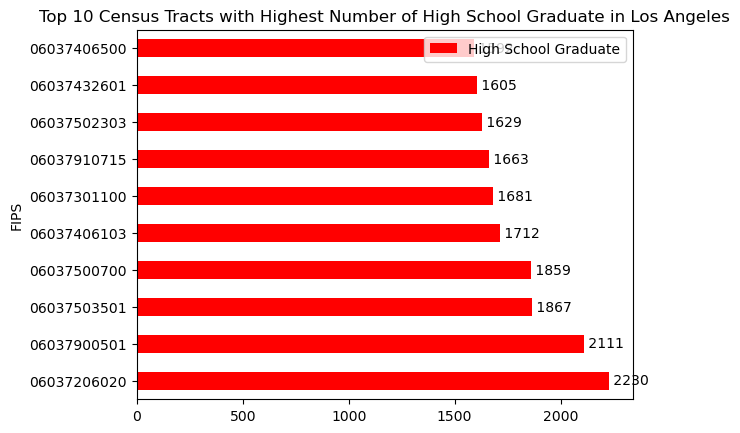

In [25]:
# make the figure looks better
ax = df_sorted.head(10).plot.barh(x='FIPS',
                            y='High School Graduate', 
                            title='Top 10 Census Tracts with Highest Number of High School Graduate in Los Angeles',
                            color='red')

# add number for each column
# define numbers
numbers = [2230, 2111, 1867, 1859, 1712, 1681, 1663, 1629, 1605, 1592]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [26]:
# display the first ten data
df_sorted = df2.sort_values(by='High School Graduate',ascending = False)
df_filtered = df_sorted[df_sorted['High School Graduate'] != 0]
df_filtered[['FIPS', 'High School Graduate']].tail(10)

,FIPS,High School Graduate
2472,06037980014,13
761,06037222700,12
938,06037265301,10
770,06037224701,10
2479,06037980021,9
2440,06037920303,6
2468,06037980010,6
2482,06037980024,5
117,06037115103,4
1221,06037402404,2


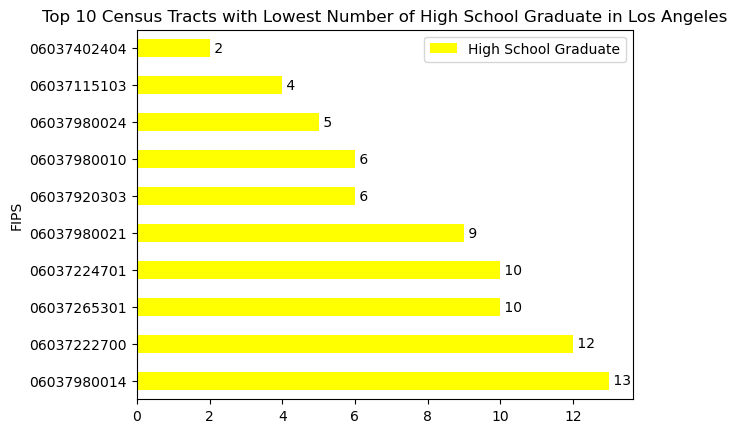

In [27]:
# make the figure looks better
ax = df_filtered.tail(10).plot.barh(x='FIPS',
                            y='High School Graduate', 
                            title='Top 10 Census Tracts with Lowest Number of High School Graduate in Los Angeles',
                            color='yellow')

# add number for each column
# define numbers
numbers = [13, 12, 10, 10, 9, 6, 6, 5, 4, 2]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [28]:
# define variable
df_sorted = df2.sort_values(by='Bachelor',ascending = False)
# display the first ten data
df_sorted[['FIPS','Bachelor']].head(10)

,FIPS,Bachelor
2278,06037702900,3561
1028,06037275604,3197
606,06037207902,2842
2175,06037621104,2824
2239,06037700200,2477
2240,06037700300,2471
2165,06037620701,2378
2249,06037700902,2301
2176,06037621201,2292
2178,06037621301,2231


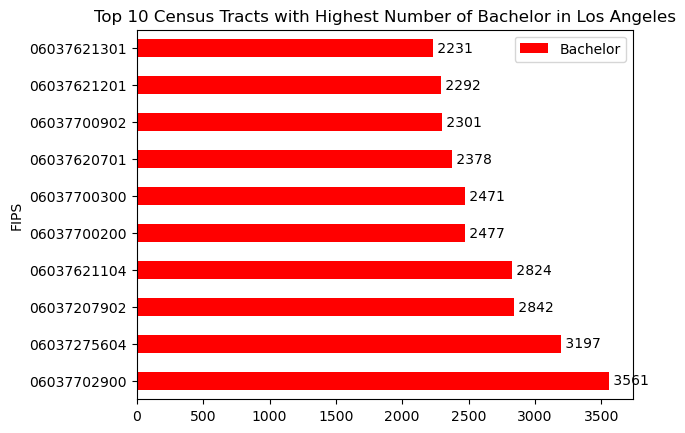

In [29]:
# make the figure looks better
ax = df_sorted.head(10).plot.barh(x='FIPS',
                            y='Bachelor', 
                            title='Top 10 Census Tracts with Highest Number of Bachelor in Los Angeles',
                            color='red')

# add number for each column
# define numbers
numbers = [3561, 3197, 2842, 2824, 2477, 2471, 2378, 2301, 2292, 2231]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In [30]:
# display the first ten data
df_sorted = df2.sort_values(by='Bachelor',ascending = False)
df_filtered = df_sorted[df_sorted['Bachelor'] != 0]
df_filtered[['FIPS', 'Bachelor']].tail(10)

,FIPS,Bachelor
1226,06037402504,27
902,06037242100,26
820,06037232601,23
1724,06037534203,21
2474,06037980016,20
569,06037204410,20
784,06037228320,14
2487,06037980031,11
1233,06037402801,9
2468,06037980010,8


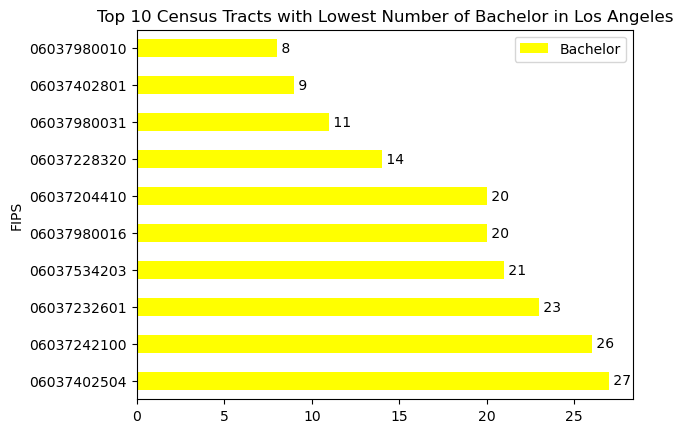

In [31]:
# make the figure looks better
ax = df_filtered.tail(10).plot.barh(x='FIPS',
                            y='Bachelor', 
                            title='Top 10 Census Tracts with Lowest Number of Bachelor in Los Angeles',
                            color='yellow')

# add number for each column
# define numbers
numbers = [27, 26, 23, 21, 20, 20, 14, 11, 9, 8]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display numbers
             va='center')  # center alignment

plt.show()

In these figures, we can clearly see which census tracts have the highest and lowest number of households with less than high school, high school graduate, and bachelor's degrees. Additionally, the exact number of households in each census tract is provided.

## Plot Educational Attainment Map

In this section, I want to plot the choropleth maps for each educational attainment category.

In [32]:
# read in a geojson file 
tracts=gpd.read_file('2020_Census_Tracts.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


<Axes: >

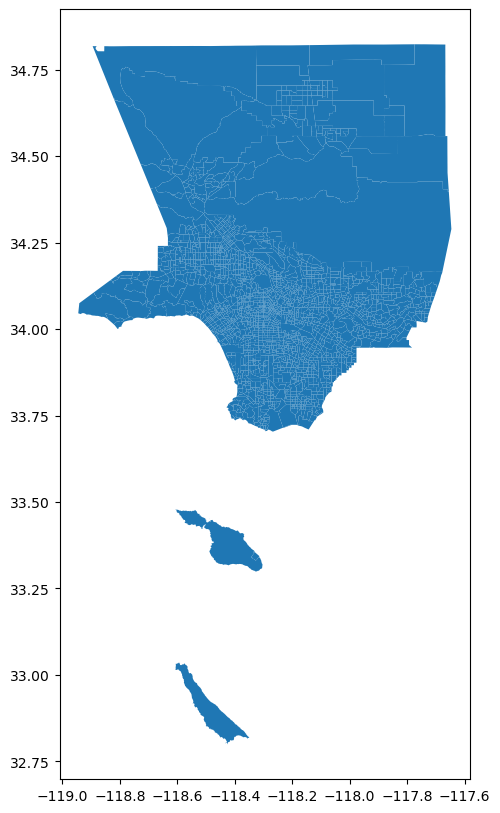

In [33]:
# plot it
tracts.plot(figsize=(12,10))

In [34]:
# info about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [35]:
# only keep FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [36]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [37]:
# check it
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222


In [38]:
# create a new dataframe based on the join
tracts['FIPS'] = tracts['FIPS'].astype(int)
df2['FIPS'] = df2['FIPS'].astype(int)

# Merge the DataFrames
tracts_education = tracts.merge(df2, on='FIPS')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_228/2941396304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FIPS'] = df2['FIPS'].astype(int)


In [39]:
# check it
tracts_education.head()

,CT20,geometry,FIPS,Population 25 Years and Over,Less than High School,High School Graduate,Some College,Bachelor,Master,Professional School,Doctorate
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",6037101110,3119,255,722,1240,694,157,32,19
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",6037101122,3132,504,481,944,659,357,61,126
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",6037101220,2560,595,482,742,525,163,33,20
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,2682,694,444,814,473,178,23,56
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",6037101222,2090,295,708,835,211,29,12,0


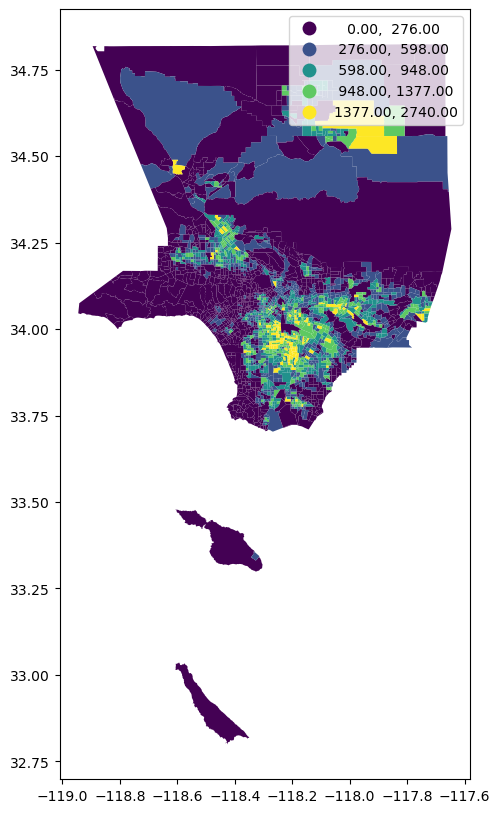

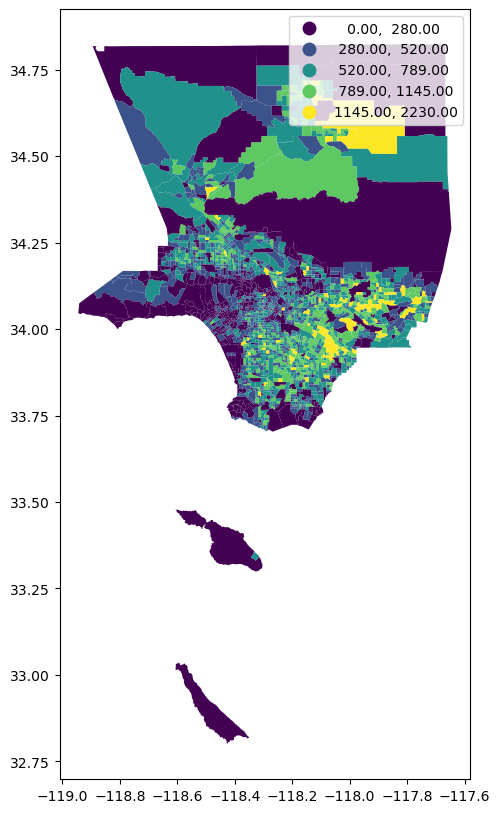

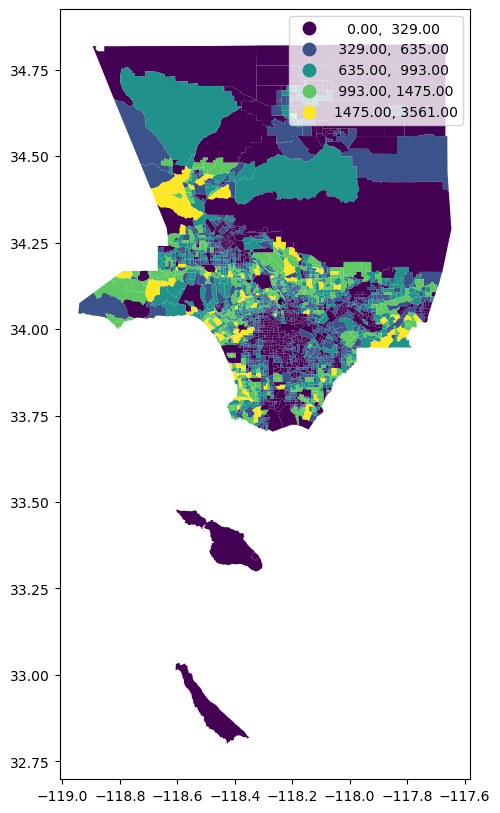

In [40]:
# create a list of routes
education_categories = ["Less than High School","High School Graduate","Bachelor"]

for education in education_categories:
    
# create choropleth maps in geopandas
    tracts_education.plot(figsize=(12,10),
                     column=education,
                     legend=True, 
                     scheme='NaturalBreaks')